NAME: DEEPESH BHATTA
    


## 2.4 (10pts) Visualize 10 PC as images. That is, reshape each PC as a 28x28 image and show it as a 2D image. Any interesting shapes?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('mnist/mnist_train.csv')
X = train_data.drop("label",axis=1)
y = train_data['label']

In [3]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
from sklearn.preprocessing import StandardScaler
X_fit = StandardScaler().fit_transform(X)
#y_scaled = StandardScaler().fit_transform(y.values.reshape(-1,1))

In [5]:
X_mean = np.mean(X_fit, axis = 0)
X_centered = (X_fit - X_mean)
covariance_matrix = np.cov(X_centered, rowvar = 0)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values_sorted = np.argsort(-eigen_values)

In [6]:
from PCA import PCA
#Applying it to PCA function
X_reduced = PCA(X_fit , 10)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(y, columns = ['label'])] , axis = 1)

principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,5.140478,-5.226445,-3.887001,-0.901512,4.929111,-2.035413,-4.706946,4.767184,0.230958,-1.460962,1
1,-19.292332,6.032996,-1.308148,-2.383294,3.095188,1.791095,3.772790,-0.153865,-4.115192,-4.299357,0
2,7.644503,-1.705813,-2.289326,2.241135,5.094426,4.152058,1.012004,-1.732559,0.436261,-0.073687,1
3,0.474207,5.836139,-2.008617,4.271106,2.377777,-2.179913,-4.398030,0.353712,0.992308,5.501253,4
4,-26.559574,6.024818,-0.933179,-3.012645,9.489179,2.331195,6.149597,1.783637,-4.123302,-5.757361,0


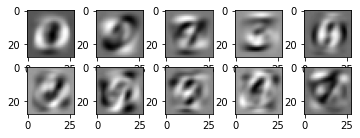

In [7]:
for i in range(10):
    X_pca = eigen_vectors[:,eigen_values_sorted[i]].reshape(28,28)
    plt.subplot(4,5,i+1)
    plt.imshow(X_pca.real, cmap = "gray")

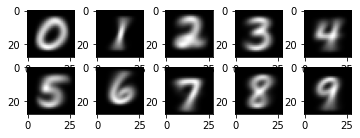

In [8]:
for i in range(10):
    img = np.mean(X[y == i], axis = 0)
    img = img.values.reshape(28,28)
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap = "gray")

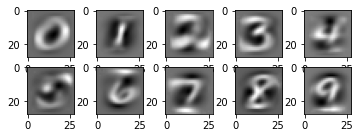

In [9]:
for i in range(10):
    img_fit = np.mean(X_fit[y == i], axis = 0)
    img_fit = img_fit.reshape(28,28)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_fit, cmap = "gray")